In [13]:
import pandas as pd

#для оптимизации и удобства работы, считываем первые 30% датафрейма
data = pd.read_csv(r"C:\Users\Alex\Desktop\data_science\мфти\hw2\train.csv", nrows=30000000)
data



,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
29999995,29999995,611488640,643006676,5974,0,160,3,1,7000.0,True
29999996,29999996,611530386,643006676,349,0,161,1,1,9000.0,True
29999997,29999997,611553434,643006676,1199,0,162,3,1,10000.0,True
29999998,29999998,611580001,643006676,886,0,163,3,1,16000.0,True


In [14]:
#считываем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000000 entries, 0 to 29999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 2.2+ GB


In [20]:
#посчитаем количество уникальных пользователей в выборке
data.user_id.nunique()



117345

In [21]:
data.count()

row_id                            30000000
timestamp                         30000000
user_id                           30000000
content_id                        30000000
content_type_id                   30000000
task_container_id                 30000000
user_answer                       30000000
answered_correctly                30000000
prior_question_elapsed_time       29300184
prior_question_had_explanation    29882996
dtype: int64

In [19]:
data.user_answer.value_counts()

 0    8358086
 1    7993621
 3    7730387
 2    5335094
-1     582812
Name: user_answer, dtype: int64

In [22]:
data.answered_correctly.value_counts()

 1    19346120
 0    10071068
-1      582812
Name: answered_correctly, dtype: int64

In [24]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

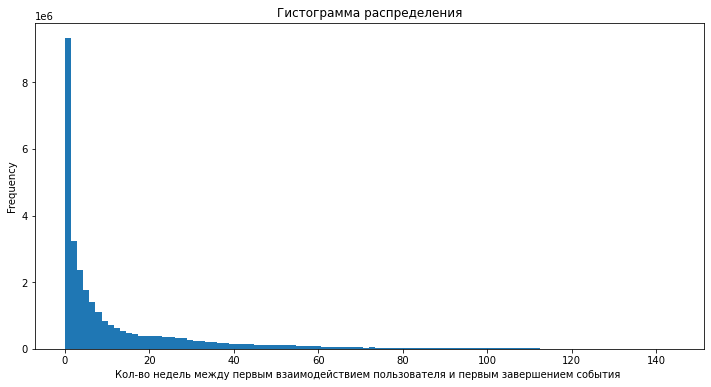

In [27]:
ts = data['timestamp']/(1000*60*60*24*7)  #преобразуем время из мс в недели"
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100)
plt.title("Гистограмма распределения")
plt.xticks(rotation=0)
plt.xlabel("Кол-во недель между первым взаимодействием пользователя и первым завершением события ")
plt.show()

In [29]:
correct = data[data.answered_correctly != -1].answered_correctly.value_counts(ascending=True)
correct
# примерно на треть вопросов были даны неправильные ответы

0    10071068
1    19346120
Name: answered_correctly, dtype: int64

In [32]:
#процент правильным ответов на 17% больше в тех случаях когда было объяснение
data[data.answered_correctly != -1]\
      .groupby(['prior_question_had_explanation'], dropna=False)   \
      .agg({'answered_correctly': ['mean', 'count']})

answered_correctly          
                                             mean     count
prior_question_had_explanation                             
False                                    0.500353   2722711
True                                     0.673663  26577473
NaN                                      0.679720    117004

In [108]:
#проверим гипотезу,что существует зависимость между количеством ответов студента и правильностью ответов
users_ans = data.groupby(['user_id'])   \
      .agg({'answered_correctly': ['mean', 'count']}) 
      
users_ans[users_ans.answered_correctly['count'] > 100].describe()

answered_correctly              
                    mean         count
count       37104.000000  37104.000000
mean            0.610638    730.648070
std             0.107302   1179.706378
min            -0.013072    101.000000
25%             0.546547    172.000000
50%             0.620155    330.000000
75%             0.684211    763.000000
max             0.947929  16789.000000

In [115]:
users_ans[users_ans.answered_correctly['count'] < 100].describe()
#гипотеза подтверждена - чем больше ответов дает студент, тем выше процент правильных ответов. 
# 

answered_correctly              
                    mean         count
count       80013.000000  80013.000000
mean            0.493329     35.834602
std             0.167347     19.871908
min            -0.142857      1.000000
25%             0.366667     21.000000
50%             0.500000     30.000000
75%             0.615385     43.000000
max             1.000000     99.000000

In [63]:
#читаем следующие CSV:

questions = pd.read_csv(r"C:\Users\Alex\Desktop\data_science\мфти\hw2\questions.csv")
lectures = pd.read_csv(r"C:\Users\Alex\Desktop\data_science\мфти\hw2\lectures.csv")


In [37]:
print(questions.head(), questions.shape)

   question_id  bundle_id  correct_answer  part            tags
0            0          0               0     1   51 131 162 38
1            1          1               1     1       131 36 81
2            2          2               0     1  131 101 162 92
3            3          3               0     1  131 149 162 29
4            4          4               3     1    131 5 162 38 (13523, 5)


In [64]:
#определили,что на 5 раздел приходится наибольшее количество вопросов 
questions.part.value_counts()




5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: part, dtype: int64

In [65]:
#получим список тегов
questions['tags'] = questions['tags'].astype(str)

tags = [x.split() for x in questions[questions.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'Количество уникальных тегов {len(tags)} ')
tags_list = [x.split() for x in questions.tags.values]
questions['tags'] = tags_list
questions.head()




Количество уникальных тегов 188 


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,"[51, 131, 162, 38]"
1,1,1,1,1,"[131, 36, 81]"
2,2,2,0,1,"[131, 101, 162, 92]"
3,3,3,0,1,"[131, 149, 162, 29]"
4,4,4,3,1,"[131, 5, 162, 38]"


In [66]:
#Узнаем количество правильных и неверных ответов приходится на  question_id

correct = data[data.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct.columns = ['Wrong', 'Right']
correct = correct.fillna(0)
correct[['Wrong', 'Right']] = correct[['Wrong', 'Right']].astype(int)
questions = questions.merge(correct, left_on = "question_id", right_on = "content_id", how = "left")
questions.head()

,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,"[51, 131, 162, 38]",196.0,1879.0
1,1,1,1,1,"[131, 36, 81]",235.0,2000.0
2,2,2,0,1,"[131, 101, 162, 92]",6000.0,7528.0
3,3,3,0,1,"[131, 149, 162, 29]",1549.0,5338.0
4,4,4,3,1,"[131, 5, 162, 38]",3597.0,5788.0


In [68]:
#высчитаем процент верных ответов на каждый тег
questions.tags.values

tags_df = pd.DataFrame()
for x in range(len(tags)):
    df = questions[questions.tags.apply(lambda l: tags[x] in l)]
    df1 = df.agg({'Wrong': ['sum'], 'Right': ['sum']})
    df1['Total_questions'] = df1.Wrong + df1.Right
    df1['Question_ids_with_tag'] = len(df)
    df1['tag'] = tags[x]
    df1 = df1.set_index('tag')
    tags_df = tags_df.append(df1)

tags_df[['Wrong', 'Right', 'Total_questions']] = tags_df[['Wrong', 'Right', 'Total_questions']].astype(int)
tags_df['Percent_correct'] = tags_df.Right/tags_df.Total_questions
tags_df = tags_df.sort_values(by = "Percent_correct")

tags_df.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarn

C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarn

C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarn

C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarn

C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_9428\3349329038.py:11: FutureWarn

,Wrong,Right,Total_questions,Question_ids_with_tag,Percent_correct
tag,,,,,
24,46525,29216,75741,17,0.385736
23,77373,60575,137948,11,0.439115
19,51163,40552,91715,57,0.442152
151,80899,77905,158804,16,0.490573
167,50196,50618,100814,11,0.502093


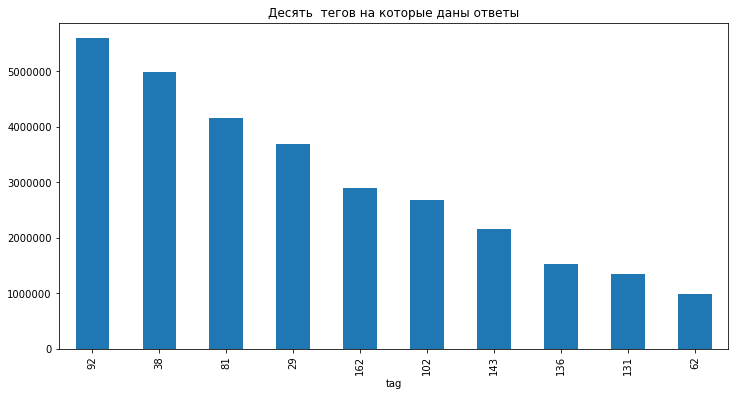

In [71]:
tags_select = tags_df.sort_values(by = "Total_questions", ascending = False).iloc[:10,:]
tags_select = tags_select["Total_questions"]

fig = plt.figure(figsize=(12,6))
ax = tags_select.plot.bar()
plt.title("Десять  тегов на которые даны ответы")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [76]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [77]:
#количество lectures_id
lectures.shape[0]

418

In [79]:
#распределение по типу лекций
lect_type_of = lectures.type_of.value_counts()
lect_type_of

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

False    72740
True     44605
Name: Watches_lecture, dtype: int64


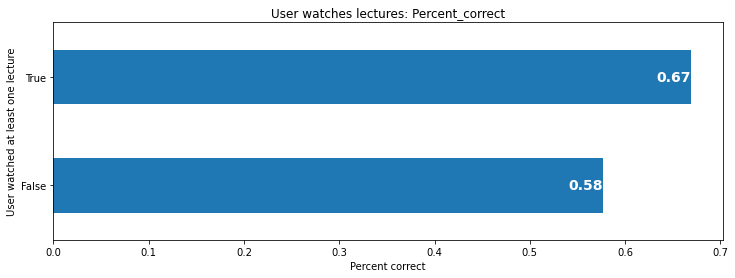

In [80]:

user_lect = data.groupby(["user_id", "answered_correctly"]).size().unstack()
user_lect.columns = ['Lecture', 'Wrong', 'Right']
user_lect['Lecture'] = user_lect['Lecture'].fillna(0)
user_lect = user_lect.astype('Int64')
user_lect['Watches_lecture'] = np.where(user_lect.Lecture > 0, True, False)

watches_l = user_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
print(user_lect.Watches_lecture.value_counts())

watches_l['Percent_correct'] = watches_l.Right/(watches_l.Right + watches_l.Wrong)

watches_l = watches_l.iloc[:,2]

fig = plt.figure(figsize=(12,4))
watches_l.plot.barh()
for i, v in zip(watches_l.index, watches_l.values):
    plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')

plt.title("Студент просматривал лекцию: Процент правильных ответов")
plt.xlabel("Процент правильных ответов")
plt.ylabel("Студент просмотрел как минимум одну лекцию")
plt.xticks(rotation=0)
plt.show()
# Вывод: просмотр лекций повышает количество правильных ответов

Выводы:
1) чем больше ответов давал студент, тем выше доля правильных ответов
2) На 5 раздел TOEIC test приходится наибольшее число вопросов 
3) Если студент просматривал лекцию, то вероятность  дать правильный ответ  у студента выше чем у того кто не просматривал 
4) Процент правильным ответов на 17% больше в тех случаях когда было дано объяснение